**Впишите библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime


### Задание 1
Загрузить данные `crime.csv.zip`, индекс переменная вида дата/время. Вывести три первые строки.

In [2]:
df = pd.read_csv('crime.csv.zip', parse_dates = ['Unnamed: 0']).set_index("Unnamed: 0")
display(df.head(3))
df.index

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


DatetimeIndex(['2010-07-01 00:10:00', '2010-07-01 00:11:00',
               '2010-07-01 00:35:00', '2010-07-01 00:44:00',
               '2010-07-01 01:10:00', '2010-07-01 01:38:00',
               '2010-07-01 01:45:00', '2010-07-01 05:50:00',
               '2010-07-01 06:38:00', '2010-07-01 06:43:00',
               ...
               '2015-12-31 22:40:00', '2015-12-31 22:40:00',
               '2015-12-31 22:46:00', '2015-12-31 22:50:00',
               '2015-12-31 22:56:00', '2015-12-31 23:09:00',
               '2015-12-31 23:40:00', '2015-12-31 23:44:00',
               '2015-12-31 23:55:00', '2015-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=273181, freq=None)

### Задание 2
Количество правонарушений по годам (на последний день года). Ответ в виде Series, индекс - дата/время.

In [3]:
df.resample('y')['driver_gender'].count()

Unnamed: 0
2010-12-31    23075
2011-12-31    46981
2012-12-31    50687
2013-12-31    55433
2014-12-31    53122
2015-12-31    43883
Freq: A-DEC, Name: driver_gender, dtype: int64

### Задание 3
Для 2012 года построить сводную таблицу **по клоличеству правонарушений** (строки - пол (driver_gender), колонки - расса (driver_race))

In [4]:
only_2012 = df['2012']
# only_2012.index.year.unique() ПРОВЕРКА, что только 2012

pd.crosstab(index = only_2012["driver_gender"], columns = only_2012['driver_race'])

C:\Users\Daniil\AppData\Local\Temp\ipykernel_5912\3123195948.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  only_2012 = df['2012']


driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,173,230,85,12,18203
M,425,726,344,38,30451


### Задание 4
Найти среднее количество правонарушений в зависимости от дня недели
и построить столбцовую диаграмму. Дни недели продписать названиями, а не номерами.

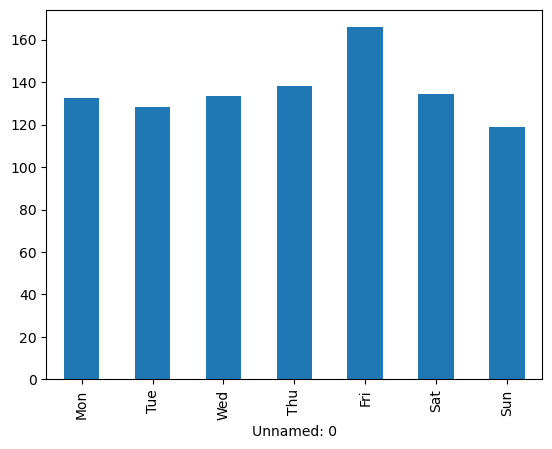

In [14]:
fig, ax = plt.subplots()
df['Weekday'] = df.index.dayofweek
group_day = df.resample('D')['id'].count()
barchart = group_day.groupby(group_day.index.dayofweek).mean()
barchart.plot(kind = 'bar')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show();

### Задание 5
Для всех пятниц построить среднее число правонарушений по часам.

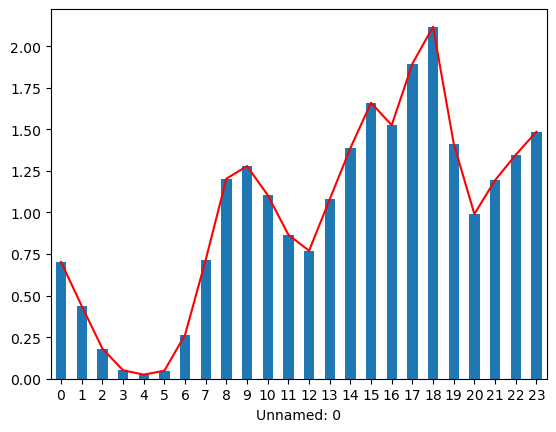

In [21]:
only_friday = df[df['day_name'] == 'Friday'].resample('H')['id'].count()
friday = only_friday.groupby(only_friday.index.hour).mean()
friday.plot(kind = 'bar')
friday.plot(kind = 'line', color = 'red');

### Задание 6
Загрузить данные `summer.csv`. Вывести три первые строки.

In [7]:
summer = pd.read_csv('summer.csv')

# На всякий случай сделаю индекс datetime

summer["Datetime"] = pd.to_datetime(summer["Year"], format = "%Y")
summer = summer.set_index("Datetime")
display(summer.head(3))

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
Datetime,,,,,,,,,
1896-01-01,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1896-01-01,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
1896-01-01,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [8]:
summer.index

DatetimeIndex(['1896-01-01', '1896-01-01', '1896-01-01', '1896-01-01',
               '1896-01-01', '1896-01-01', '1896-01-01', '1896-01-01',
               '1896-01-01', '1896-01-01',
               ...
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01'],
              dtype='datetime64[ns]', name='Datetime', length=31165, freq=None)

### Задание 7
Построить таблицу с общим количеством золотых, серебрянных и бронзовых 
медалей (столбцы) для мужчин и женщин (строки).

In [9]:
seven = pd.crosstab(index = summer["Gender"], columns = summer['Medal'])
display(seven)

Medal,Bronze,Gold,Silver
Gender,,,
Men,7539,7698,7509
Women,2830,2788,2801


### Задание 8
Найти количество женщин по годам участвовавших в летних олимпиадах по годам\
важно, подумать прежде, чем кодить ...

,Количество женщин
Datetime,
1900,11
1904,12
1908,15
1912,30
1920,43
1924,51
1928,95
1932,60
1936,84


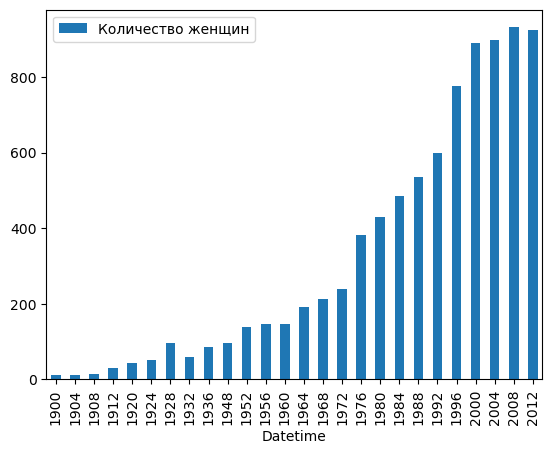

In [10]:
summer_only_women = summer[summer["Gender"] == "Women"]
eight= summer_only_women.groupby(summer_only_women.index.year)["Gender"].count().reset_index().set_index("Datetime").rename(columns = {'Datetime':'Год', 'Gender':'Количество женщин'})

display(eight)

eight.plot(kind='bar');

### Задание 9
Создать отдельную таблицу для олимпийских игр с 1970 по 1978 (включительно), в которой
перрекодировать медали в числа: \
'Gold':3 , 'Silver': 2, 'Bronze': 1

In [11]:
otdelnaya_tabl = summer.loc['1970':'1978']

def change(x):
    if x == 'Gold':
        new = 3
    elif x == "Silver":
        new = 2 
    elif x == "Bronze":
        new = 1
    return new 

otdelnaya_tabl["Medal"] = otdelnaya_tabl["Medal"].apply(lambda x: change(x))

display(otdelnaya_tabl)

C:\Users\Daniil\AppData\Local\Temp\ipykernel_5912\1022235627.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otdelnaya_tabl["Medal"] = otdelnaya_tabl["Medal"].apply(lambda x: change(x))


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
Datetime,,,,,,,,,
1972-01-01,1972,Munich,Aquatics,Diving,"CAGNOTTO, Giorgio Franco",ITA,Men,10M Platform,1
1972-01-01,1972,Munich,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,3
1972-01-01,1972,Munich,Aquatics,Diving,"RYDZE, Richard Anthony",USA,Men,10M Platform,2
1972-01-01,1972,Munich,Aquatics,Diving,"JANICKE, Marina",GDR,Women,10M Platform,1
1972-01-01,1972,Munich,Aquatics,Diving,"KNAPE-LINDBERGH, Ulrika",SWE,Women,10M Platform,3
...,...,...,...,...,...,...,...,...,...
1976-01-01,1976,Montreal,Wrestling,Wrestling Gre-R,"REZANTSEV, Valeri",URS,Men,82 - 90KG (Light-Heavyweight),3
1976-01-01,1976,Montreal,Wrestling,Wrestling Gre-R,"IVANOV, Stoyan",BUL,Men,82 - 90KG (Light-Heavyweight),2
1976-01-01,1976,Montreal,Wrestling,Wrestling Gre-R,"SKRZYDLEWSKI, Andrzej",POL,Men,90 - 100KG (Heavyweight),1


### Задание 10
Используя полученную таблицу в предыдущем задании, построить сводную таблицу. В строках **5 команд** набравщих суммарно больше всех баллов в медальном зачете, столбец - количество баллов.

,Medal
Country,
URS,1075
GDR,711
USA,657
FRG,340
POL,246


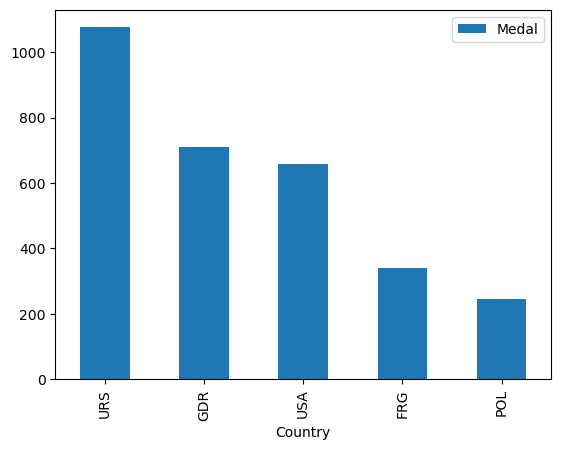

In [12]:
ten = otdelnaya_tabl.groupby("Country")["Medal"].sum().nlargest(5).reset_index().set_index("Country")
display(ten)

ten.plot(kind = 'bar');
